# Introduction

Webmd lists the most common drugs people use on their website. A screenshot is shown below.

<img src="webmd_index.png" alt="drugs" width="500"/>

Each of the drugs listed has reviews. Each review can contain the following information: condition, ratings on effectiveness, ease of use, and satisfaction, comment, age, how long reviewer used drug, and sex. An example of a review is shown below:

![image](review_example.png)

### What can we do with this information?

People prescribed a drug can see how it compares to other drugs with their condition. They can also see what others their age thought about the drug. Additionally, a user can compare different drugs.

In [2]:
import ipywidgets as widgets
import numpy as np
import pandas as pd

webmd_alldrugs = pd.read_csv('webmd_drugs.csv')

In [3]:
webmd_alldrugs.head()

,age,comment,condition,date,drug,easeOfUse,effectiveness,satisfaction,sex,timeUsed
0,25-34,DID NOT HELP ME AT ALL. I WAS FEELING MORE MIS...,Excessive Vomiting in Pregnancy,10/30/2007,Zofran oral,3,1,1,Female,less than 1 month
1,35-44,"This works really well without tiredness, but ...",Nausea and Vomiting caused by Cancer Drugs,10/26/2007,Zofran oral,5,5,4,Female,1 to 6 months
2,25-34,My body does not like to vomit so instead it h...,Excessive Vomiting in Pregnancy,10/17/2007,Zofran oral,5,5,5,Female,less than 1 month
3,19-24,I vomited every day of my pregnancy. At least ...,Excessive Vomiting in Pregnancy,9/29/2007,Zofran oral,5,5,4,Female,1 to 6 months
4,NaN,This medicine has allowed me to continue worki...,Excessive Vomiting in Pregnancy,9/27/2007,Zofran oral,5,4,3,NaN,NaN


In [4]:
webmd_alldrugs['comment'] = webmd_alldrugs['comment'].str.lower()
webmd_alldrugs['drug'] = webmd_alldrugs['drug'].str.lower()
webmd_alldrugs['condition'] = webmd_alldrugs['condition'].str.lower()
drug_groups = webmd_alldrugs.groupby('drug')
condition_groups = webmd_alldrugs.groupby('condition')
print(drug_groups.size())
print(condition_groups.size())

drug
abilify oral            1739
actos oral               602
acyclovir oral           336
adderall xr oral         591
ambien oral             1381
amitriptyline oral      1064
amoxicillin oral         326
atenolol oral           1264
ativan oral             1039
azithromycin oral        568
baclofen oral            539
bactrim ds oral          569
benadryl oral            188
benzonatate oral         794
bupropion hcl oral       370
buspirone oral           394
bystolic oral            885
celebrex oral            738
celexa oral             2212
cialis oral              414
cipro oral               613
citalopram oral         1571
clindamycin hcl oral     716
clonazepam oral          972
concerta oral            603
coumadin oral            585
crestor oral             655
cyclobenzaprine oral     425
depakote oral            658
dexilant oral            385
                        ... 
nortriptyline oral       450
oxycontin oral          1462
pantoprazole oral        221
percocet 

Things to do per drug:
* see ease of use, effectiveness, and satisfaction for each drug
* find common words for each drug
* compare how long people used drug for
* do the above for each condition people used the drug for
* the above by age

Per condition:
* see drugs used for each condition
* compare what people thought for those drugs
* find most popular drugs
* the above by age

In [5]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [96]:
options = list(webmd_alldrugs['drug'].unique())
options.sort()
options

['abilify oral',
 'actos oral',
 'acyclovir oral',
 'adderall xr oral',
 'ambien oral',
 'amitriptyline oral',
 'amoxicillin oral',
 'atenolol oral',
 'ativan oral',
 'azithromycin oral',
 'baclofen oral',
 'bactrim ds oral',
 'benadryl oral',
 'benzonatate oral',
 'bupropion hcl oral',
 'buspirone oral',
 'bystolic oral',
 'celebrex oral',
 'celexa oral',
 'cialis oral',
 'cipro oral',
 'citalopram oral',
 'clindamycin hcl oral',
 'clonazepam oral',
 'concerta oral',
 'coumadin oral',
 'crestor oral',
 'cyclobenzaprine oral',
 'depakote oral',
 'dexilant oral',
 'dilaudid oral',
 'doxycycline oral',
 'effexor xr oral',
 'flagyl oral',
 'gabapentin oral',
 'hydrochlorothiazide oral',
 'hydrocodone-acetaminophen oral',
 'ibuprofen oral',
 'keflex oral',
 'keppra oral',
 'levaquin oral',
 'levothyroxine oral',
 'lexapro oral',
 'lipitor oral',
 'lisinopril oral',
 'lorazepam oral',
 'losartan oral',
 'lyrica oral',
 'macrobid oral',
 'meloxicam oral',
 'methadone oral',
 'methocarbamol o

In [76]:
import plotly.plotly as py
import plotly.graph_objs as go

drug = 'abilify oral'
drug_starRatings = drug_groups.get_group(drug)
drug_easeOfUse = drug_starRatings.groupby('easeOfUse').agg({'condition':['count']})
drug_effectiveness = drug_starRatings.groupby('effectiveness').agg({'condition':['count']})
drug_satisfaction = drug_starRatings.groupby('satisfaction').agg({'condition':['count']})
drug_easeOfUse.columns = drug_easeOfUse.columns.droplevel(0)
drug_effectiveness.columns = drug_effectiveness.columns.droplevel(0)
drug_satisfaction.columns = drug_satisfaction.columns.droplevel(0)

trace1 = go.Bar(x=drug_easeOfUse.index, y=drug_easeOfUse.get('count'), name = 'Ease of Use', marker = dict(
          color = 'green'
        ))
trace2 = go.Bar(x=drug_effectiveness.index, y=drug_effectiveness.get('count'), name = 'Effectiveness', marker = dict(
          color = 'blue'
        ))
trace3 = go.Bar(x=drug_satisfaction.index, y=drug_satisfaction.get('count'), name = 'Satisfaction', marker = dict(
          color = 'purple'
        ))
data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Ease of Use, Effectiveness, and Satisfaction Ratings'
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [134]:
list(webmd_alldrugs['drug'].unique())

['zofran oral',
 'atenolol oral',
 'ativan oral',
 'azithromycin oral',
 'baclofen oral',
 'bactrim ds oral',
 'benadryl oral',
 'benzonatate oral',
 'bupropion hcl oral',
 'buspirone oral',
 'bystolic oral',
 'celebrex oral',
 'celexa oral',
 'cialis oral',
 'cipro oral',
 'citalopram oral',
 'abilify oral',
 'protonix oral',
 'prozac oral',
 'risperdal oral',
 'ritalin oral',
 'savella oral',
 'seroquel oral',
 'simvastatin oral',
 'synthroid oral',
 'toprol xl oral',
 'tramadol oral',
 'trazodone oral',
 'valium oral',
 'valtrex oral',
 'vicodin es oral',
 'vyvanse oral',
 'wellbutrin xl oral',
 'xanax oral',
 'mobic oral',
 'morphine oral',
 'nabumetone oral',
 'namenda oral',
 'neurontin oral',
 'nortriptyline oral',
 'oxycontin oral',
 'pantoprazole oral',
 'percocet oral',
 'phentermine oral',
 'plaquenil oral',
 'plavix oral',
 'pradaxa oral',
 'pravastatin oral',
 'prednisone oral',
 'prilosec otc oral',
 'promethazine oral',
 'ibuprofen oral',
 'keflex oral',
 'keppra oral',


In [143]:
from ipywidgets import widgets
from IPython.display import display
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from ipywidgets import interact, interactive, fixed, interact_manual

def update_plot(drug):
    drug_starRatings = drug_groups.get_group(drug)
    drug_easeOfUse = drug_starRatings.groupby('easeOfUse').agg({'condition':['count']})
    drug_effectiveness = drug_starRatings.groupby('effectiveness').agg({'condition':['count']})
    drug_satisfaction = drug_starRatings.groupby('satisfaction').agg({'condition':['count']})
    drug_easeOfUse.columns = drug_easeOfUse.columns.droplevel(0)
    drug_effectiveness.columns = drug_effectiveness.columns.droplevel(0)
    drug_satisfaction.columns = drug_satisfaction.columns.droplevel(0)

    trace1 = go.Bar(x=drug_easeOfUse.index, y=drug_easeOfUse.get('count'), name = 'Ease of Use', marker = dict(
              color = 'green'
            ))
    trace2 = go.Bar(x=drug_effectiveness.index, y=drug_effectiveness.get('count'), name = 'Effectiveness', marker = dict(
              color = 'blue'
            ))
    trace3 = go.Bar(x=drug_satisfaction.index, y=drug_satisfaction.get('count'), name = 'Satisfaction', marker = dict(
              color = 'purple'
            ))
    
    data = [trace1, trace2, trace3]

layout = go.Layout(
    barmode='group',
    title = 'Ease of Use, Effectiveness, and Satisfaction Ratings')

updatemenus=list([
    dict(
        buttons=list([webmd_alldrugs['drug'].unique()]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.1,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    ),
])

annotations = list([
    dict(text='Select Drug:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
])

layout['updatemenus'] = updatemenus
layout['annotations'] = annotations


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)
    
# w = widgets.Dropdown(
#     options= list(webmd_alldrugs['drug'].unique()),
#     value='abilify oral',
#     description='Choose Drug',
# )

# w.observe(update_plot)

# display(w)
# interact(update_plot, Name=list(webmd_alldrugs['drug'].unique()))


PlotlyListEntryError: Invalid entry found in 'buttons' at index, '0'

Path To Error: ['updatemenus'][0]['buttons'][0]

Valid items for 'buttons' at path ['updatemenus'][0]['buttons'] under parents ['layout', 'updatemenus', 'updatemenu']:
    ['dict']


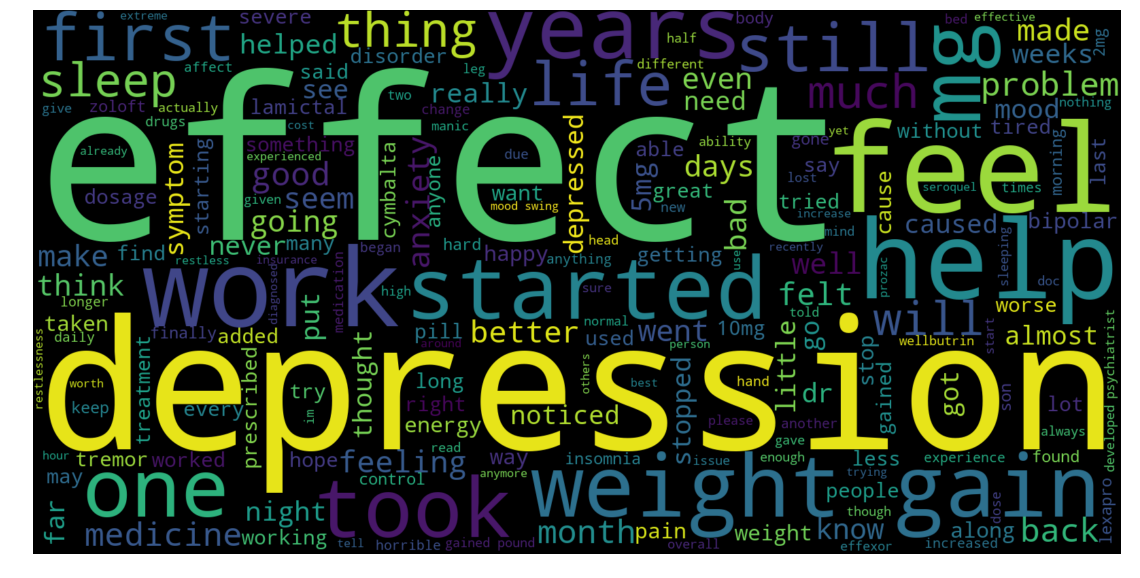

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

# Start with one review:
text = text = " ".join([str(com) for com in drug_starRatings.comment])

# Create stopword list:
stopwords = set(STOPWORDS)
drug_split = drug.split()
stopwords.update([drug_split[0], "medication", "drug", "side", "med", "day", "now", "take", "taking", "year",
                 "effect", "month", "time", "doctor", "week", "meds", "nan"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, width=1600, height=800).generate(text)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
drug_timeUsed = drug_starRatings.groupby('timeUsed').agg({'condition':['count']})
drug_timeUsed.columns = drug_timeUsed.columns.droplevel(0)
drug_timeUsed.reset_index(level=0, inplace=True)
new_index= [6,0,5,1,3,4,2]
drug_timeUsed.reindex(new_index)
drug_timeUsed

timeUsedBar = [go.Bar(
            x=drug_timeUsed['timeUsed'],
            y=drug_timeUsed['count']
    )]
layout2 = go.Layout(
    title = 'How long reviewers used drug for'
)
fig2 = go.Figure(data=timeUsedBar, layout=layout2)
plotly.offline.iplot(fig2,show_link=False)

In [70]:
drug_bycondition = drug_starRatings.groupby('condition')
condition = 'additional medications to treat depression'
drug_condition = drug_bycondition.get_group(condition)



condition
a rare developmental disorder of infants               7
additional medications to treat depression           735
bipolar disorder in remission                        146
bipolar i disorder with most recent episode mixed    343
condition:                                             1
mania associated with bipolar disorder               139
other                                                259
schizophrenia                                        106
tourette's                                             3
dtype: int64

In [ ]:
from bokeh.io import output_notebook, show
output_notebook()

In [ ]:
drug_bycondition.size()